# Bandlimited Sawtooth
## References
http://faust.grame.fr/    
https://aaltodoc.aalto.fi/bitstream/handle/123456789/7747/publication6.pdf?sequence=9

Python Port of Fausts Sawtooth Function:
```

saw2(freq) = y with { // newer PTR version (stateless - freq can vary at any speed)
  p0 = float(ma.SR)/float(max(1.0e-7,abs(freq))); // period in samples
  t0 = 1.0/p0; // phase increment
  p = ((_<:(-(1)<:_,_),_) <: selector1,selector2) ~(+(t0)):!,_;
  selector1 = select2(<(0)); // for feedback
  selector2 = select2(<(0), (_<:_,(*(1-p0):+(1)):+), _); // for output
  y = 2*p-1;
};
```

### Issues
- Does seem to alias quite strong. Clearly visible and audible.


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.signal as sig
from IPython.display import Audio

In [3]:
def tfPlot(sig, fs=44100):
    """
    Function for getting a time/frequency domain plot.
    """
    N = len(sig)
    t = np.arange(N)/fs
    plt.figure(figsize=[17,5])
    plt.subplot(121)
    plt.title('Time Domain')
    plt.plot(t,sig)
    plt.grid()
    plt.xlabel('Time[sec]')
    plt.subplot(122)

    plt.semilogx(np.linspace(1,fs/2, int(N/2)), abs(np.fft.fft(sig))[0:int(N/2)])
    plt.xlabel('Freq[Hz]')
    plt.title('Spectrum')
    plt.grid()
    plt.show()



In [4]:
T = 1
fs = 44100.
N = int(T*fs)
n = arange(N)
t = n/fs

In [5]:
def selector(s,x1,x2):
    if s>0:
        return x2
    else:
        return x1

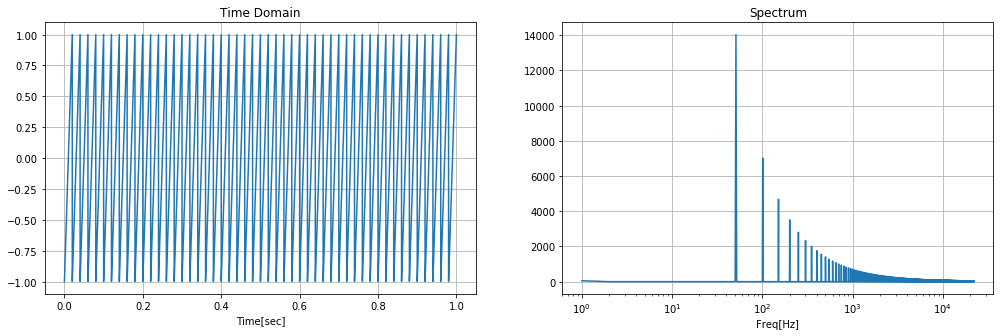

In [12]:
freq = 50.

Y = zeros_like(t)
z = 0
for i in range(N):   
    p0 = fs/(max(abs(freq),1e-7)) #period in samples
    t0 = 1./p0 #phase increment
    add1 = z+t0
    intermed = add1 -1
    selector1 = selector((intermed<0)*1, intermed, add1)
    
    selector2Chain = (intermed * (1-p0) +1)+intermed
    outval = selector((intermed<0)*1,selector2Chain, add1)
    Y[i]=outval
    z = selector1
Y = (2.*Y)-1.
    
tfPlot(Y, fs = fs)

In [13]:
Audio(data=Y, rate=fs)

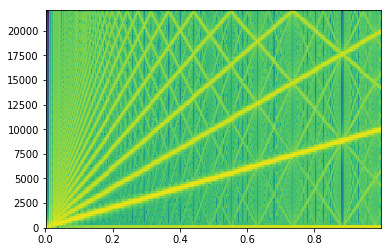

In [14]:
T = 1
fs = 44100.
N = int(T*fs)
n = arange(N)
t = n/fs

freqSweep = linspace(20, 10000, N)

Y = zeros_like(t)
z = 0
for i in range(N):
    freq = freqSweep[i]
    p0 = fs/(max(abs(freq),1e-7)) #period in samples
    t0 = 1./p0 #phase increment
    add1 = z+t0
    intermed = add1 -1
    selector1 = selector((intermed<0)*1, intermed, add1)
    
    selector2Chain = (intermed * (1-p0) +1)+intermed
    outval = selector((intermed<0)*1,selector2Chain, add1)
    Y[i]=outval
    z = selector1
Y = (2.*Y)-1.

specgram(Y, Fs = fs)
plt.show()

In [15]:
Audio(data=Y, rate=fs)